In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [29]:
special_names = ['LR001', 'LR0001', 'LR0001_2k']
special_models = [['..'+i.strip('results.npy') for 
                  i in glob.glob('../tensorboard_runs/*'+s+'/*.npy')][0] for s in special_names]

In [30]:
special_models

['../tensorboard_runs/LR001/',
 '../tensorboard_runs/LR0001/',
 '../tensorboard_runs/LR0001_2k/']

In [36]:
req_len = 68
models = ['..'+i.strip('results.npy')
             for i in glob.glob('../tensorboard_runs/04-05*/*.npy')]
models.extend(special_models)

run_dicts = [np.load(i+'results.npy', allow_pickle=True).item() 
             for i in models]

idx = [it for it,r in enumerate(run_dicts) if len(r)==req_len]
models=np.array(models)[idx]
run_dicts = np.array(run_dicts)[idx]

model_names = [glob.glob(i+'*_*')[0].split('/')[-1] 
             for i in models]

model_names[-1] = model_names[-1]+special_names[-1]
model_names[-2] = model_names[-2]+special_names[-2]
model_names[-3] = model_names[-3]+special_names[-3]

In [37]:
model_names

['GATConv_GNBR_no_feats',
 'GCNConv_Decagon_feats',
 'SAGEConvMean_Decagon_feats',
 'GATConv_GNBR_feats',
 'HGCNConv_Decagon_feats',
 'GATConv_Decagon_no_feats',
 'SAGEConvMean_GNBR_feats',
 'SAGEConvMean_GNBR_no_feats',
 'GCNConv_GNBR_no_feats',
 'GATConv_Decagon_GNBR_feats',
 'GCNConv_GNBR_feats',
 'SAGEConvMean_Decagon_no_feats',
 'GCNConv_Decagon_no_feats',
 'SAGEConvMean_GNBR_featsLR001',
 'SAGEConvMean_GNBR_featsLR0001',
 'SAGEConvMean_GNBR_featsLR0001_2k']

In [38]:
f1s = {}
recalls = {}
for i in range(len(run_dicts[0])):
    f1s[i] = []
    recalls[i] = []

for dict_ in run_dicts:
    for k,v in dict_.items():
        f1s[k].append(v[0]['f1'])
        recalls[k].append(v[0]['recall'])

### Comparing results across models

In [39]:
def plot_scatter(df, baseline, ticks, label=None, title=None):
    df['name'] = ticks
    df = df.sort_values('name')
    ticks = df['name'].values
    df = df.drop('name',1)
    
    plt.scatter(x=range(len(df)),y=df.median(1),color='b')
    plt.scatter(x=range(len(df)),y=df.mean(1),color='g')
    plt.plot([0,len(df)],[baseline,baseline],'r')
    plt.ylim([0,0.8])
    plt.xlabel('Models')
    plt.ylabel(label)
    plt.title(title)
    
    plt.xticks(list(range(len(ticks))), ticks, rotation=90)
    plt.legend(['Aggarwal baseline','Median','Mean'])
    

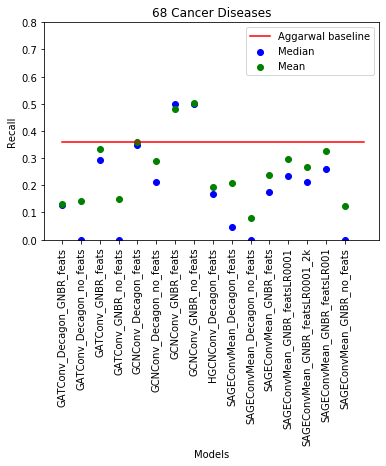

In [40]:
plot_scatter(pd.DataFrame(recalls),0.36, model_names, label='Recall', title='68 Cancer Diseases')

In [60]:
list(zip(range(len(model_names)),model_names))

[(0, 'GCNConv_Decagon_feats'),
 (1, 'SAGEConvMean_Decagon_feats'),
 (2, 'GATConv_GNBR_feats'),
 (3, 'GATConv_Decagon_no_feats'),
 (4, 'SAGEConvMean_GNBR_feats'),
 (5, 'SAGEConvMean_GNBR_no_feats'),
 (6, 'GCNConv_GNBR_no_feats'),
 (7, 'GATConv_Decagon_GNBR_feats'),
 (8, 'GCNConv_GNBR_feats'),
 (9, 'SAGEConvMean_Decagon_no_feats'),
 (10, 'GCNConv_Decagon_no_feats')]

### Comparing same model runs for consistency

In [6]:
recalls_df = pd.DataFrame(recalls).melt()
f1s_df = pd.DataFrame(f1s).melt()

Text(0, 0.5, 'f1s')

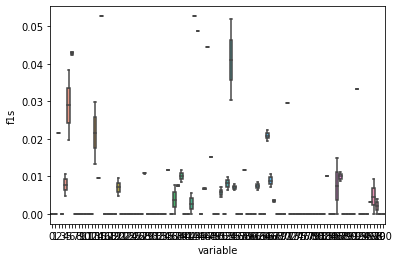

In [7]:
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')

Text(0.5, 0, 'disease')

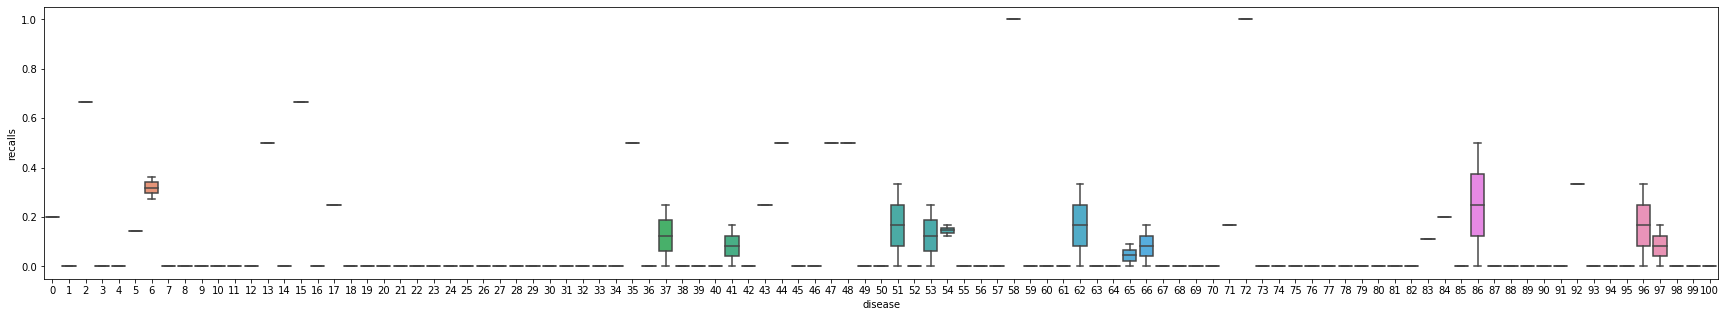

In [15]:
plt.figure(figsize=[30,5])
sns.boxplot(data=recalls_df, x='variable', y='value')
plt.ylabel('recalls')
plt.xlabel('disease')

Text(0.5, 0, 'disease')

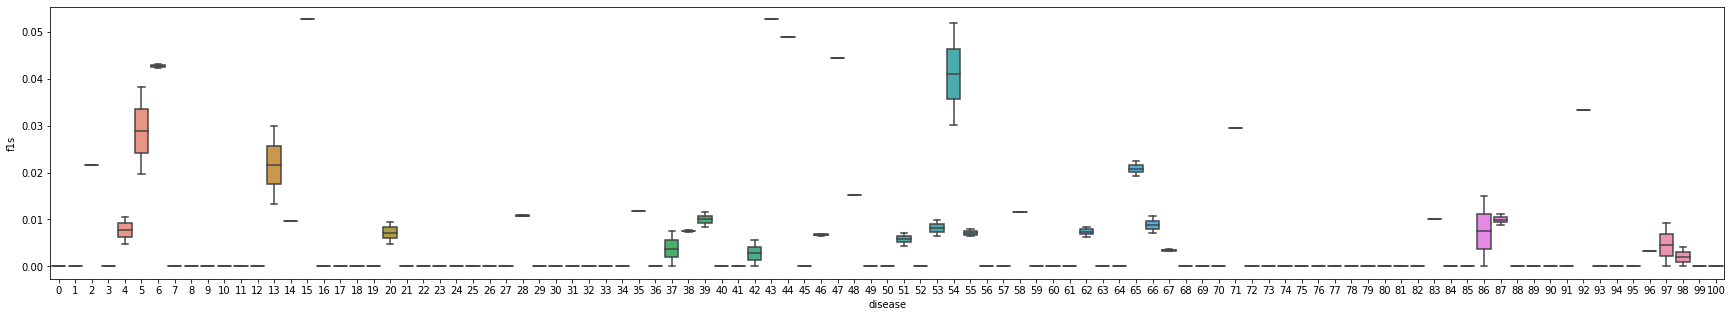

In [16]:
plt.figure(figsize=[30,5])
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')
plt.xlabel('disease')